In [15]:
!pip install hgboost

All in one training



Data preprocessing completed:
Training set size: (1185, 143)
Test set size: (509, 143)

Logistic Regression Results:
Accuracy: 0.5756

Classification Report:
              precision    recall  f1-score   support

         ALS       0.67      0.72      0.69       149
          HC       0.59      0.51      0.55       191
         MSA       0.50      0.60      0.55        25
          PD       0.51      0.51      0.51       123
         PSP       0.33      0.48      0.39        21

    accuracy                           0.58       509
   macro avg       0.52      0.56      0.54       509
weighted avg       0.58      0.58      0.58       509



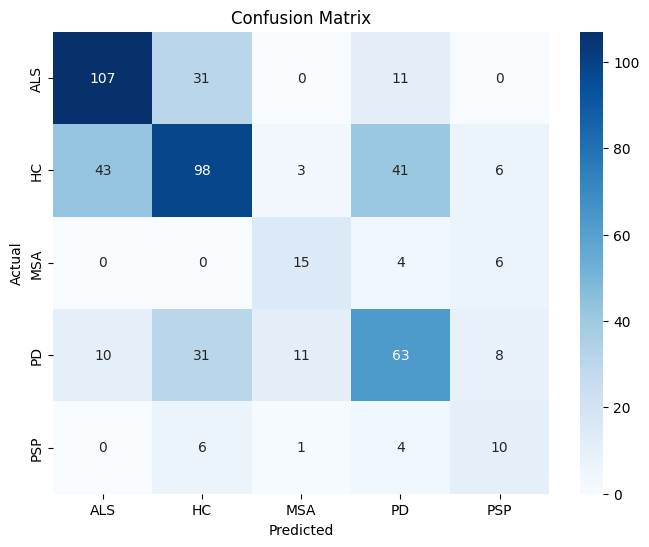

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("edward_filtered_metadata_acoustic_clinical.csv")

# Step 1: Drop irrelevant columns
columns_to_drop = [
    'subjectID', 'file_path', 'filtered_file_path', 'Age', 'Sex', 'Severity', 
    'Phoneme', 'Dataset', 'updated_file_path', 'resolved_path'
]
data = data.drop(columns=columns_to_drop, errors="ignore")

# Step 2: Handle missing values (Identify and impute)
missing_summary = data.isnull().sum()

# Impute missing values for numeric columns with their mean
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 3: Separate features (X) and target (y)
acoustic_features = data.columns.difference(["label"])  # All columns except 'label'
X = data[acoustic_features]
y = data["label"]

# Step 4: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Data preprocessing completed:")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Step 6: Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = log_reg.predict(X_test)
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt="d", cmap="Blues", 
    xticklabels=log_reg.classes_, yticklabels=log_reg.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Step 4: Separate features (X) and target (y)
acoustic_features = data.columns.difference(["label"])  # All columns except 'label'
X = data[acoustic_features]
y = data["label"]

# Step 5: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Output results for validation
print("Preprocessing completed:")
print(f"Shape of feature matrix (X): {X_scaled.shape}")
print(f"Shape of target vector (y): {y.shape}")


Preprocessing completed:
Shape of feature matrix (X): (1694, 143)
Shape of target vector (y): (1694,)


In [18]:
# Step 7: Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')  # 'balanced' handles class imbalance
log_reg.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = log_reg.predict(X_test)


Logistic Regression Accuracy: 0.5756

Classification Report:
              precision    recall  f1-score   support

         ALS       0.67      0.72      0.69       149
          HC       0.59      0.51      0.55       191
         MSA       0.50      0.60      0.55        25
          PD       0.51      0.51      0.51       123
         PSP       0.33      0.48      0.39        21

    accuracy                           0.58       509
   macro avg       0.52      0.56      0.54       509
weighted avg       0.58      0.58      0.58       509



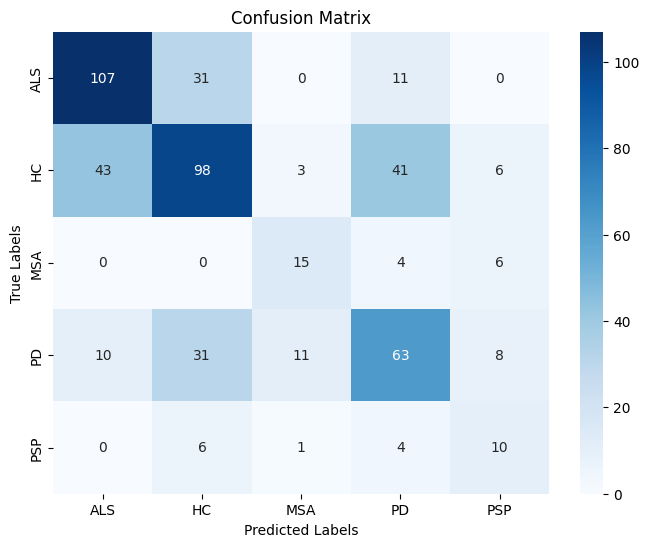

In [19]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


for each vowel


Processing vowel: A


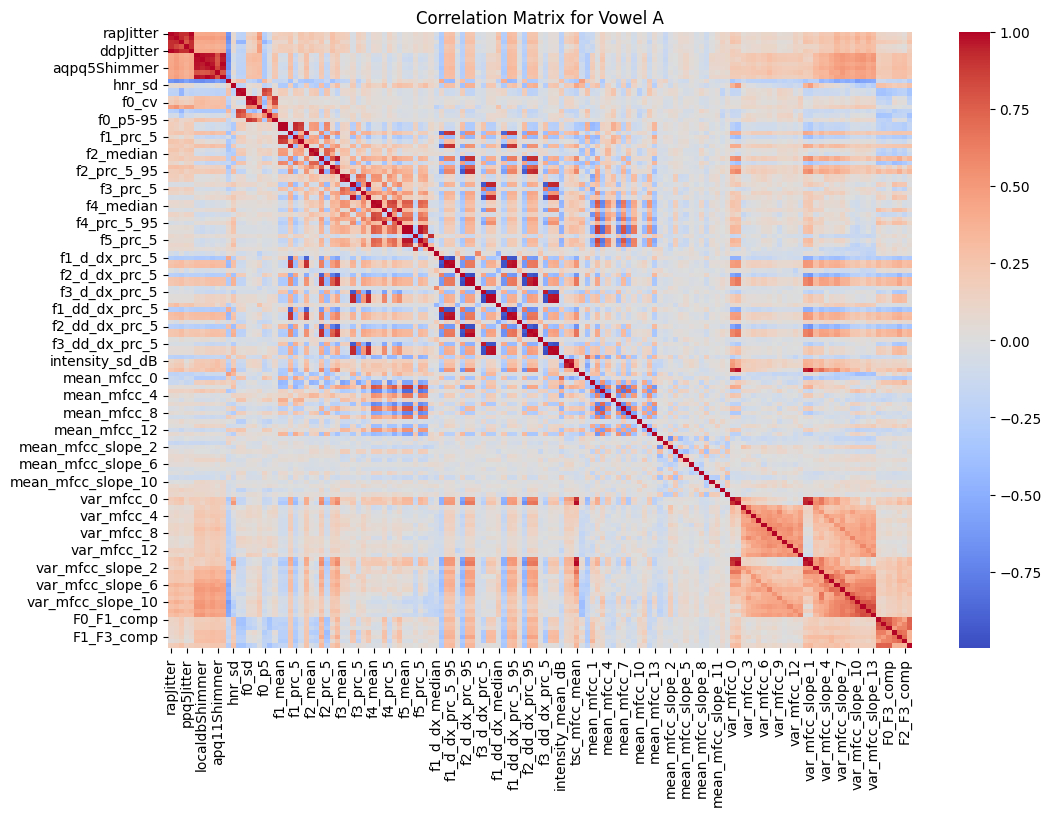

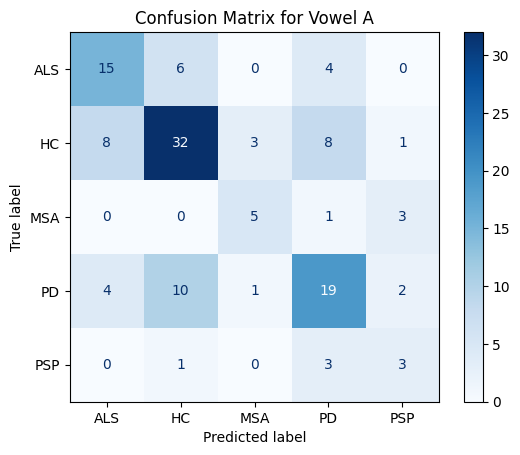

Processing vowel: E


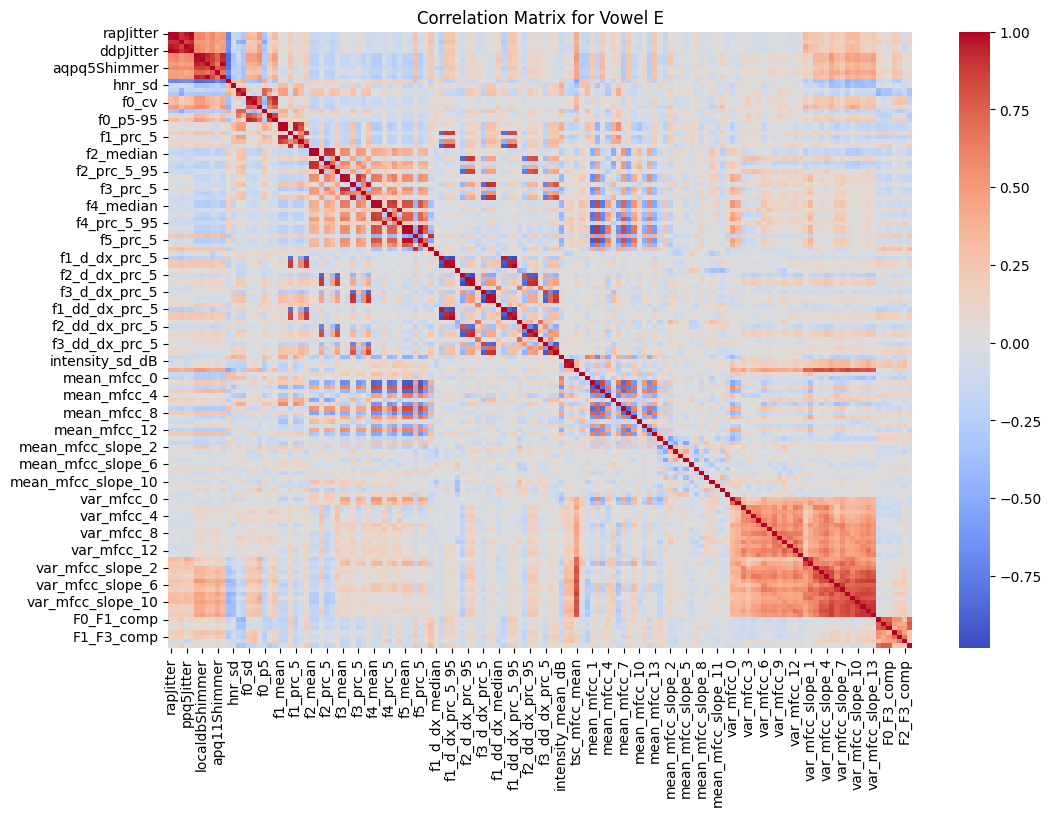

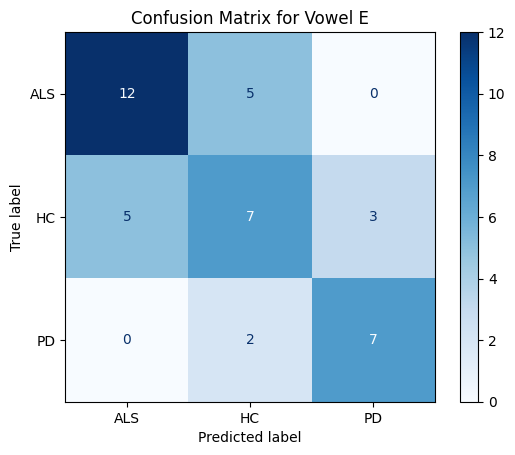

Processing vowel: I


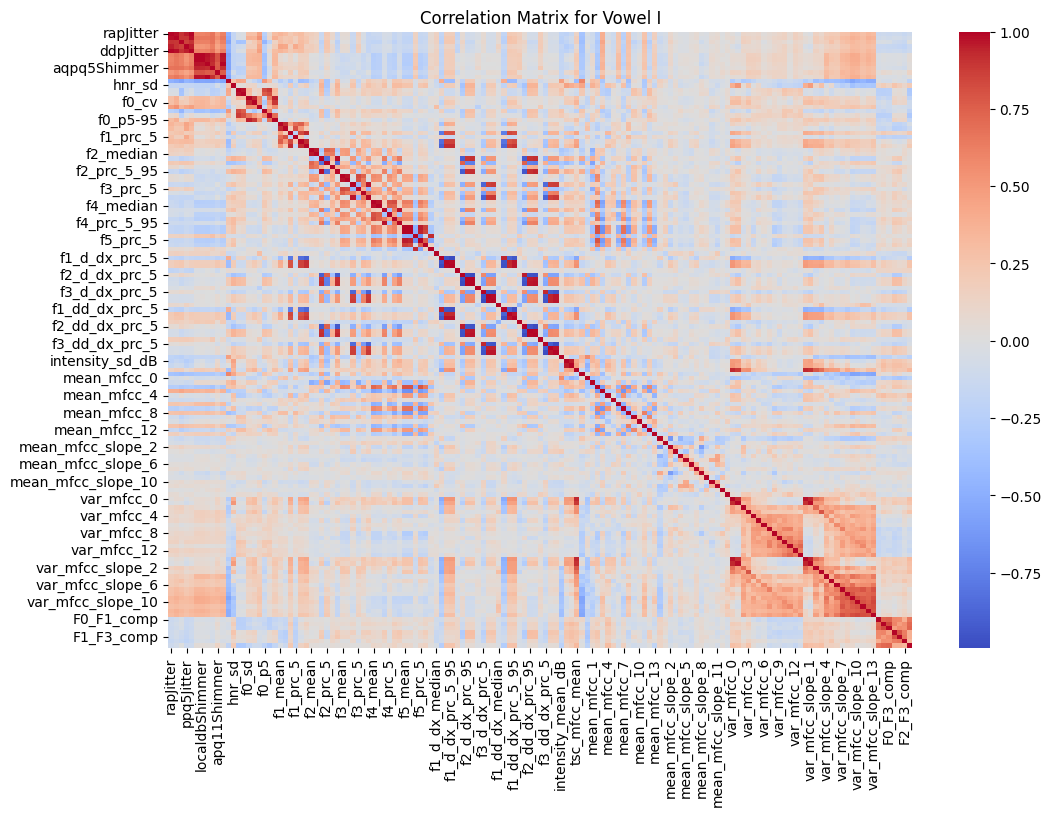

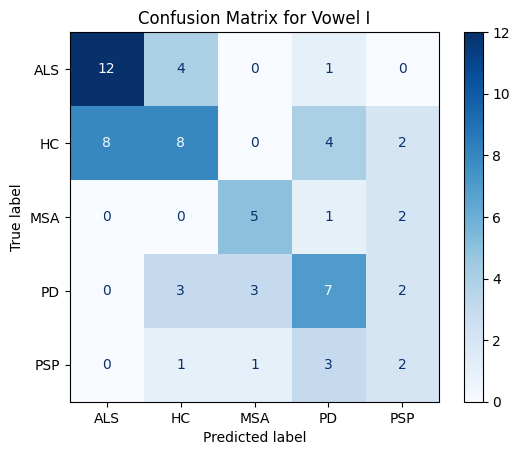

Processing vowel: O


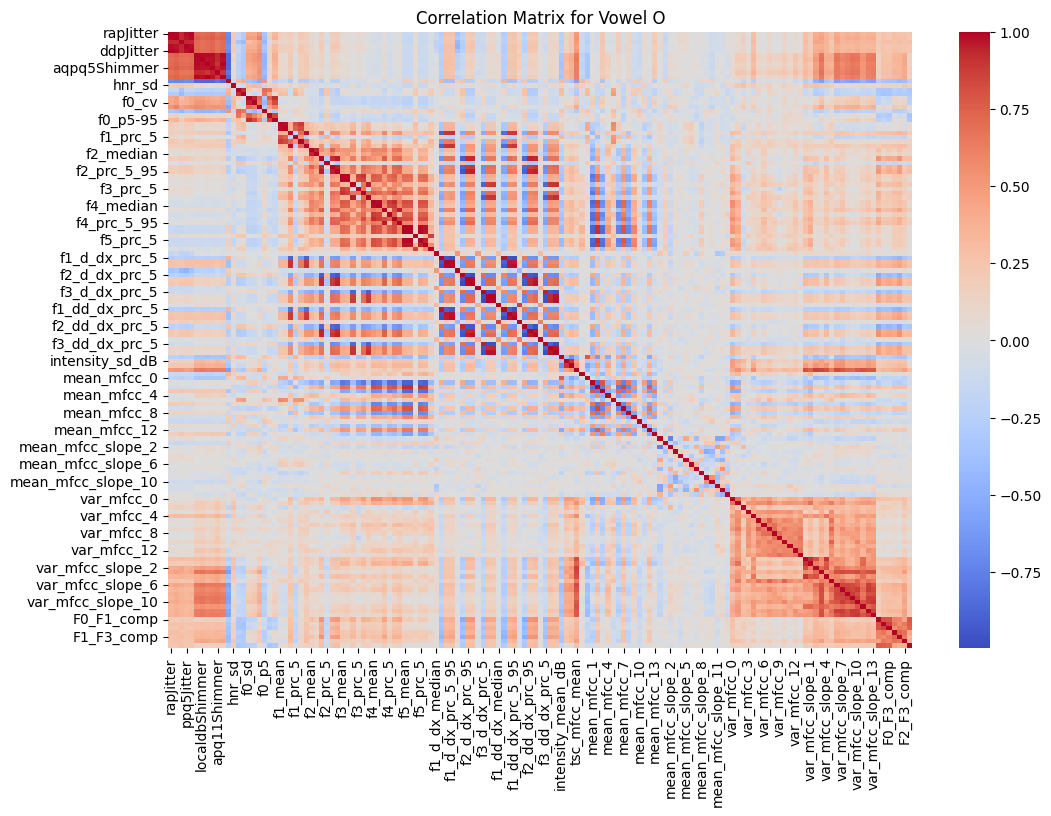

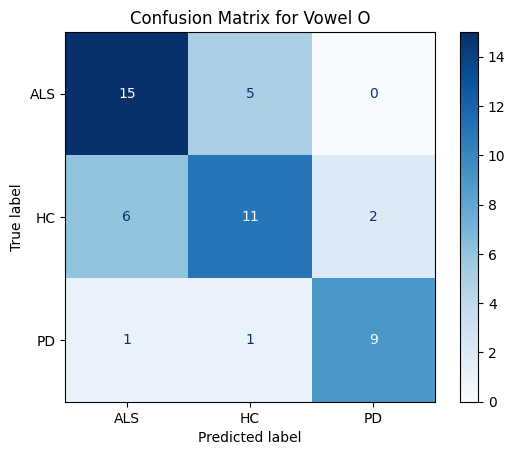

Processing vowel: U


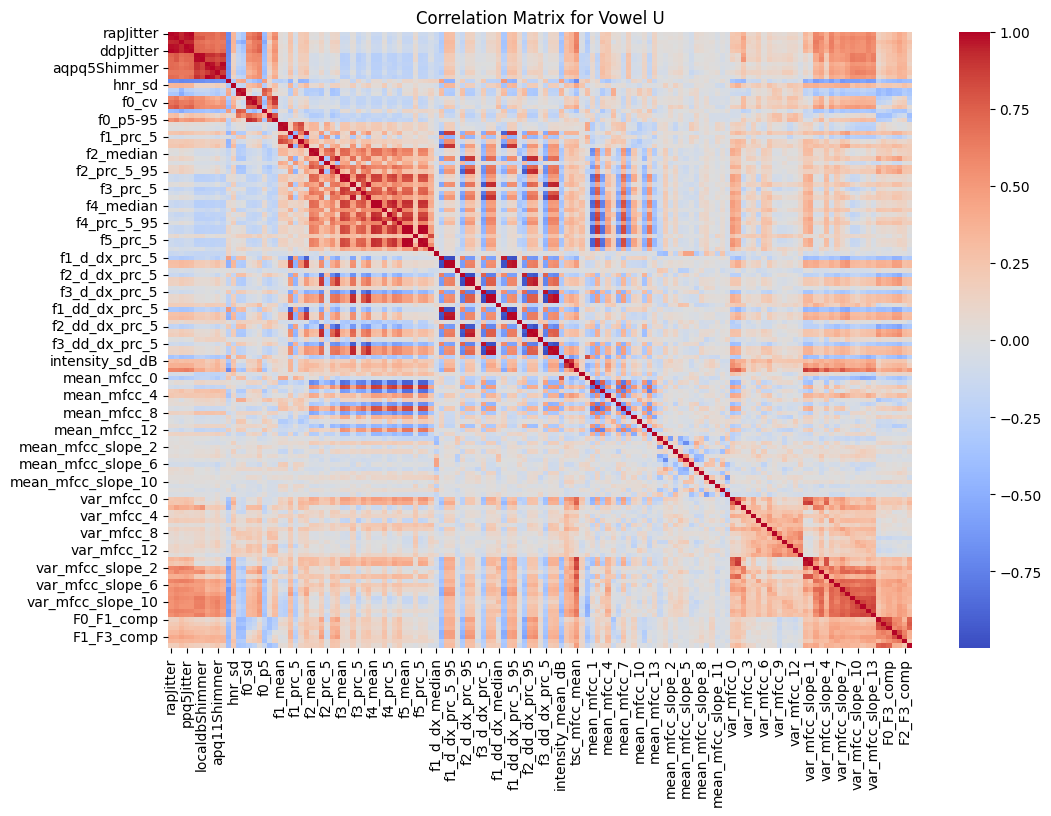

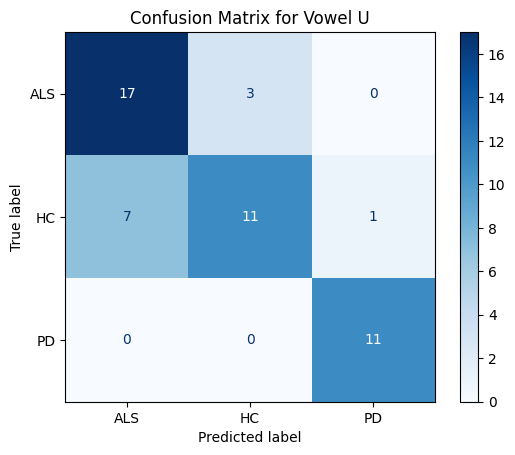


=== Results for Vowel A ===
Confusion Matrix:
[[15  6  0  4  0]
 [ 8 32  3  8  1]
 [ 0  0  5  1  3]
 [ 4 10  1 19  2]
 [ 0  1  0  3  3]]

Classification Report:
              precision    recall  f1-score     support
ALS            0.555556  0.600000  0.576923   25.000000
HC             0.653061  0.615385  0.633663   52.000000
MSA            0.555556  0.555556  0.555556    9.000000
PD             0.542857  0.527778  0.535211   36.000000
PSP            0.333333  0.428571  0.375000    7.000000
accuracy       0.573643  0.573643  0.573643    0.573643
macro avg      0.528073  0.545458  0.535271  129.000000
weighted avg   0.579258  0.573643  0.575707  129.000000

=== Results for Vowel E ===
Confusion Matrix:
[[12  5  0]
 [ 5  7  3]
 [ 0  2  7]]

Classification Report:
              precision    recall  f1-score    support
ALS            0.705882  0.705882  0.705882  17.000000
HC             0.500000  0.466667  0.482759  15.000000
PD             0.700000  0.777778  0.736842   9.000000
accura

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the dataset
data = pd.read_csv("edward_filtered_metadata_acoustic_clinical.csv")

# Drop rows where the target (label) is missing
data = data.dropna(subset=["label"])

# Ensure Phoneme is consistent in case
data["Phoneme"] = data["Phoneme"].str.upper()

# Extract unique vowels from the dataset
vowels = data["Phoneme"].unique()

# Store results for comparison
vowel_results = {}

# Columns to exclude from features
columns_to_exclude = [
    "subjectID", "file_path", "voiced_file_path", "Age", "Sex", 
    "Severity", "Phoneme", "label", "Dataset", "updated_file_path", 
    "resolved_path"
]

for vowel in vowels:
    print(f"Processing vowel: {vowel}")
    
    # Filter data for the specific vowel
    vowel_data = data[data["Phoneme"] == vowel]
    
    # Define feature columns by excluding irrelevant ones
    feature_columns = [
        col for col in vowel_data.columns 
        if col not in ["subjectID", "file_path", "voiced_file_path", "Age", "Sex", 
                       "Severity", "Phoneme", "label", "Dataset", "updated_file_path", "resolved_path"]
    ]
    X = vowel_data[feature_columns]
    y = vowel_data["label"]
    
    # Ensure only numeric columns are used
    X = X.select_dtypes(include=["float64", "int64"])
    
    # Handle missing values in X using a SimpleImputer (mean strategy)
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)
    
    # Dynamically adjust feature columns to match the imputed data
    feature_columns = X.columns.tolist()  # Align to the actual columns
    
    # Generate correlation matrix
    corr_matrix = pd.DataFrame(X_imputed, columns=feature_columns).corr()
    
    # Visualize the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Matrix for Vowel {vowel}")
    plt.show()
    
    # Check if there are at least two classes for the vowel
    if len(np.unique(y)) < 2:
        print(f"Skipping vowel {vowel} due to insufficient classes.")
        continue

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_imputed, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
    log_reg.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = log_reg.predict(X_test_scaled)
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Generate classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Visualize confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix for Vowel {vowel}")
    plt.show()
    
    # Store results
    vowel_results[vowel] = {
        "correlation_matrix": corr_matrix,
        "confusion_matrix": conf_matrix,
        "classification_report": class_report
    }

# Summarize results
for vowel, results in vowel_results.items():
    print(f"\n=== Results for Vowel {vowel} ===")
    print("Confusion Matrix:")
    print(results["confusion_matrix"])
    print("\nClassification Report:")
    print(pd.DataFrame(results["classification_report"]).transpose())



Logistic Regression Results (Accuracy Matrix):
  Vowel     ALS      HC   MSA      PD     PSP
0     A  0.6115  0.5789  1.00  0.5823  0.4286
1     E  0.7255  0.5789   NaN  1.0000     NaN
2     I  0.6701  0.4857  0.75  0.7234  0.4286
3     O  0.7059  0.5789   NaN  0.8571     NaN
4     U  0.7255  0.5263   NaN  0.7826     NaN


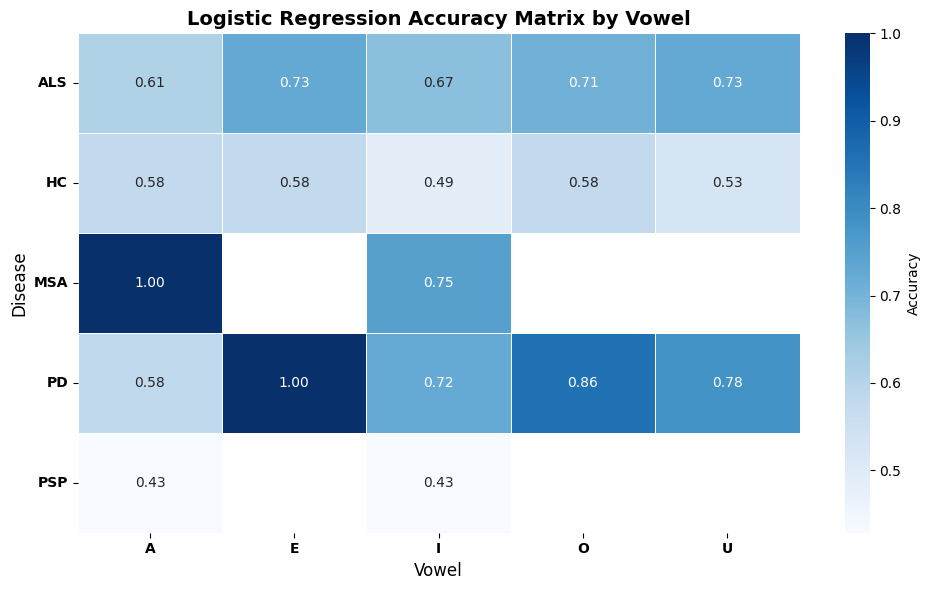

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data summary for Logistic Regression results
log_reg_results = {
    'Vowel': ['A', 'E', 'I', 'O', 'U'],
    'ALS': [0.6115, 0.7255, 0.6701, 0.7059, 0.7255],
    'HC': [0.5789, 0.5789, 0.4857, 0.5789, 0.5263],
    'MSA': [1.0000, np.nan, 0.7500, np.nan, np.nan],
    'PD': [0.5823, 1.0000, 0.7234, 0.8571, 0.7826],
    'PSP': [0.4286, np.nan, 0.4286, np.nan, np.nan],
}

# Convert results to DataFrame
results_df = pd.DataFrame(log_reg_results)

# Display the accuracy table
print("Logistic Regression Results (Accuracy Matrix):")
print(results_df)

# Heatmap Display
plt.figure(figsize=(10, 6))
sns.heatmap(
    results_df.set_index('Vowel').T,
    annot=True,
    cmap='Blues',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Accuracy'},
    annot_kws={"size": 10}
)
plt.title("Logistic Regression Accuracy Matrix by Vowel", fontsize=14, weight='bold')
plt.xlabel("Vowel", fontsize=12)
plt.ylabel("Disease", fontsize=12)
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, rotation=0, weight='bold')
plt.tight_layout()
plt.show()




Logistic Regression Results for ('HC', 'ALS') (Vowel: A):
Accuracy: 0.9048

Classification Report:
              precision    recall  f1-score   support

         ALS       0.83      0.88      0.85        40
          HC       0.94      0.92      0.93        86

    accuracy                           0.90       126
   macro avg       0.89      0.90      0.89       126
weighted avg       0.91      0.90      0.91       126



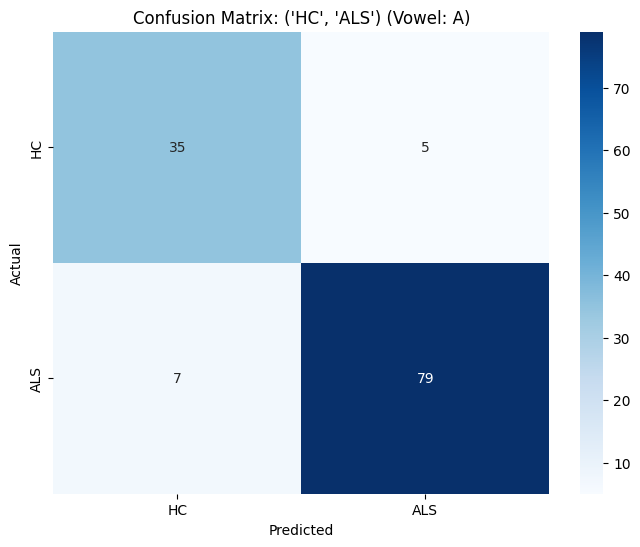


Logistic Regression Results for ('HC', 'ALS') (Vowel: E):
Accuracy: 0.7167

Classification Report:
              precision    recall  f1-score   support

         ALS       0.73      0.71      0.72        31
          HC       0.70      0.72      0.71        29

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



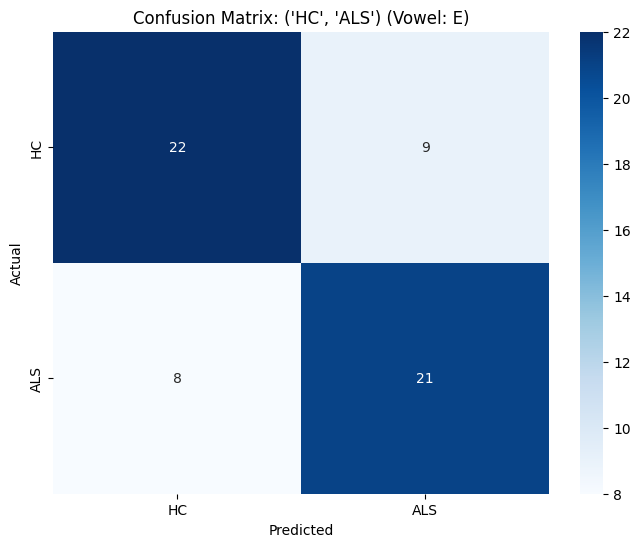


Logistic Regression Results for ('HC', 'ALS') (Vowel: I):
Accuracy: 0.8696

Classification Report:
              precision    recall  f1-score   support

         ALS       0.80      0.93      0.86        40
          HC       0.93      0.83      0.88        52

    accuracy                           0.87        92
   macro avg       0.87      0.88      0.87        92
weighted avg       0.88      0.87      0.87        92



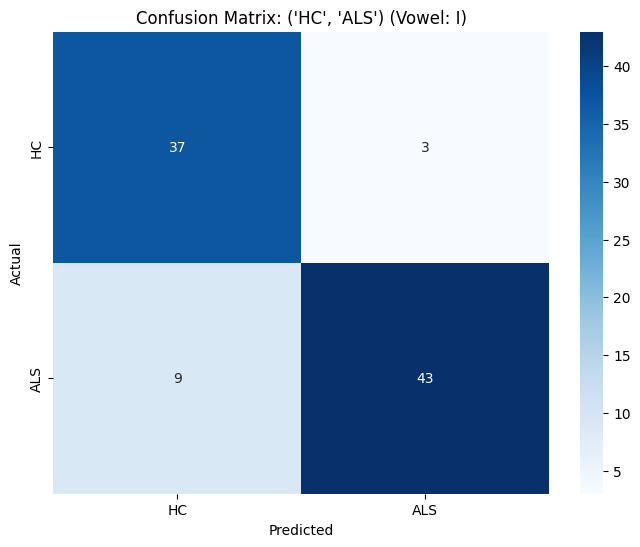


Logistic Regression Results for ('HC', 'ALS') (Vowel: O):
Accuracy: 0.7667

Classification Report:
              precision    recall  f1-score   support

         ALS       0.72      0.90      0.80        31
          HC       0.86      0.62      0.72        29

    accuracy                           0.77        60
   macro avg       0.79      0.76      0.76        60
weighted avg       0.79      0.77      0.76        60



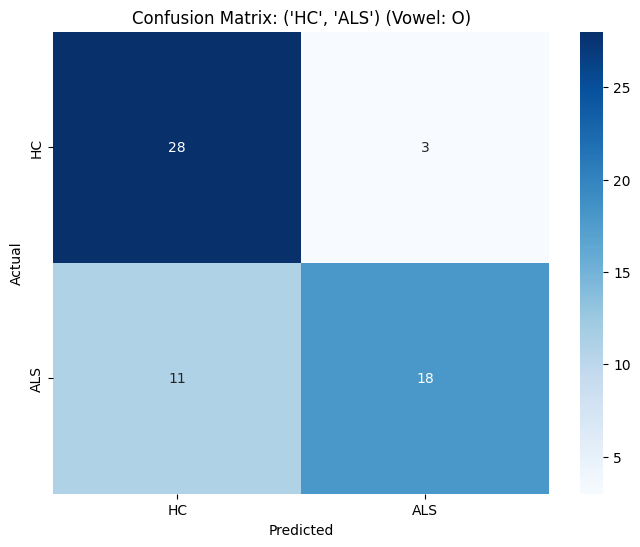


Logistic Regression Results for ('HC', 'ALS') (Vowel: U):
Accuracy: 0.8667

Classification Report:
              precision    recall  f1-score   support

         ALS       0.85      0.90      0.88        31
          HC       0.89      0.83      0.86        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



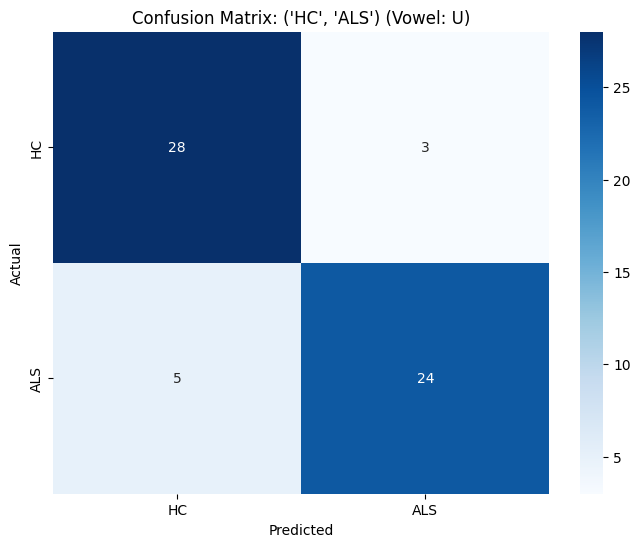


Logistic Regression Results for ('HC', 'PD') (Vowel: A):
Accuracy: 0.7379

Classification Report:
              precision    recall  f1-score   support

          HC       0.78      0.76      0.77        85
          PD       0.68      0.70      0.69        60

    accuracy                           0.74       145
   macro avg       0.73      0.73      0.73       145
weighted avg       0.74      0.74      0.74       145



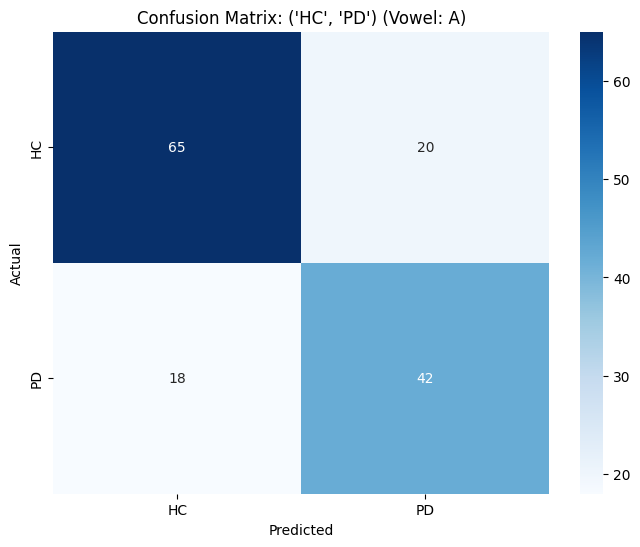


Logistic Regression Results for ('HC', 'PD') (Vowel: E):
Accuracy: 0.9111

Classification Report:
              precision    recall  f1-score   support

          HC       0.96      0.90      0.93        29
          PD       0.83      0.94      0.88        16

    accuracy                           0.91        45
   macro avg       0.90      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



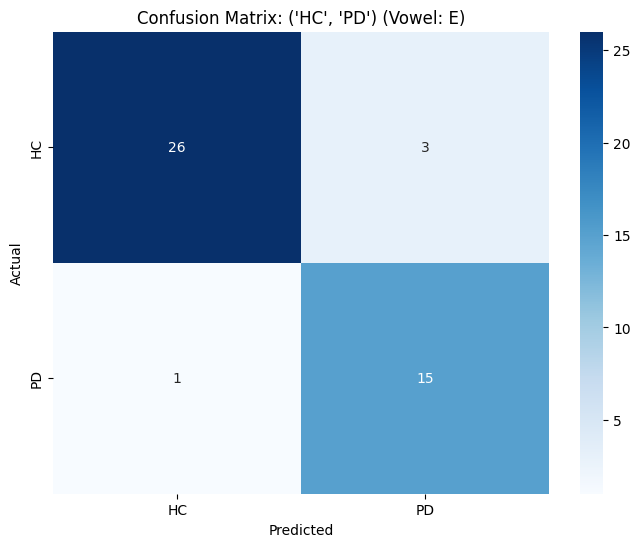


Logistic Regression Results for ('HC', 'PD') (Vowel: I):
Accuracy: 0.8171

Classification Report:
              precision    recall  f1-score   support

          HC       0.84      0.88      0.86        52
          PD       0.78      0.70      0.74        30

    accuracy                           0.82        82
   macro avg       0.81      0.79      0.80        82
weighted avg       0.81      0.82      0.81        82



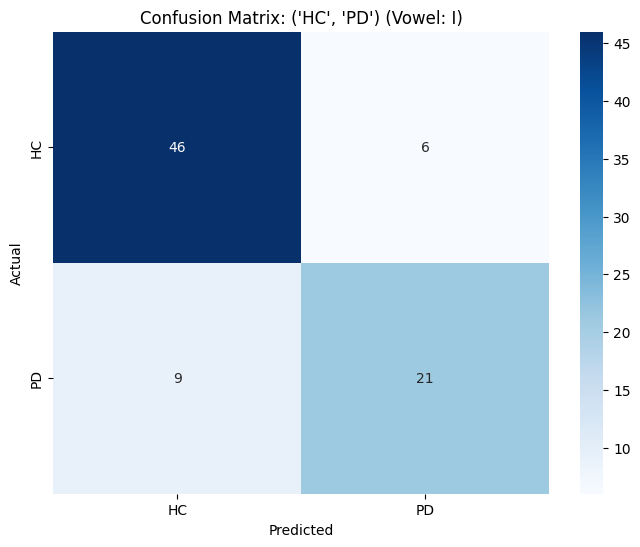


Logistic Regression Results for ('HC', 'PD') (Vowel: O):
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

          HC       0.96      0.93      0.95        29
          PD       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



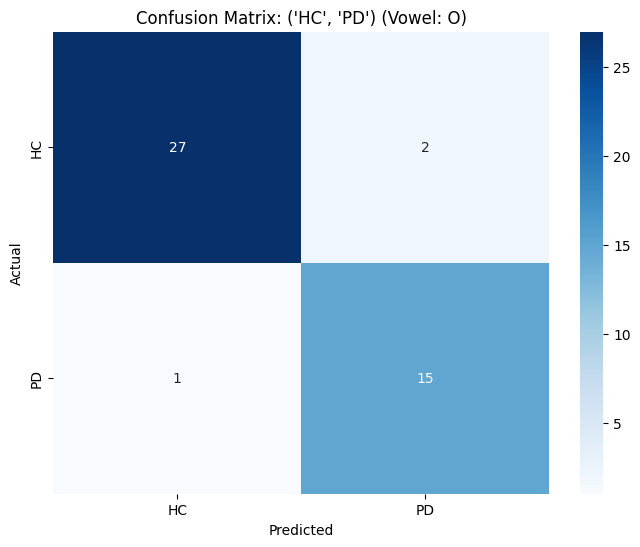


Logistic Regression Results for ('HC', 'PD') (Vowel: U):
Accuracy: 0.9778

Classification Report:
              precision    recall  f1-score   support

          HC       0.97      1.00      0.98        29
          PD       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



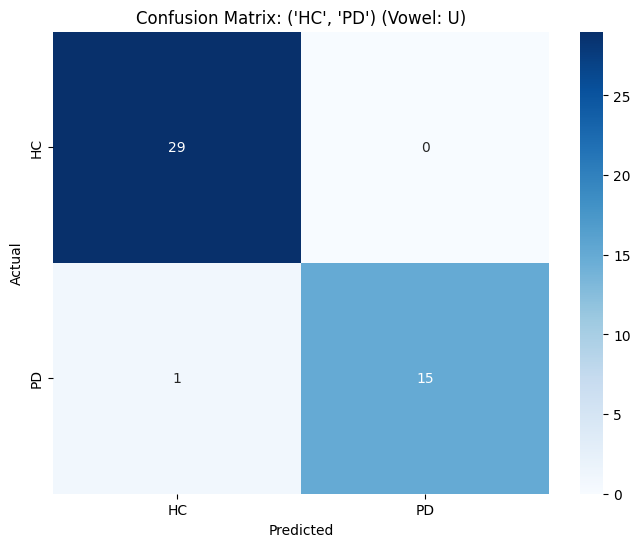


Logistic Regression Results for ('HC', 'PSP') (Vowel: A):
Accuracy: 0.8958

Classification Report:
              precision    recall  f1-score   support

          HC       0.94      0.94      0.94        85
         PSP       0.55      0.55      0.55        11

    accuracy                           0.90        96
   macro avg       0.74      0.74      0.74        96
weighted avg       0.90      0.90      0.90        96



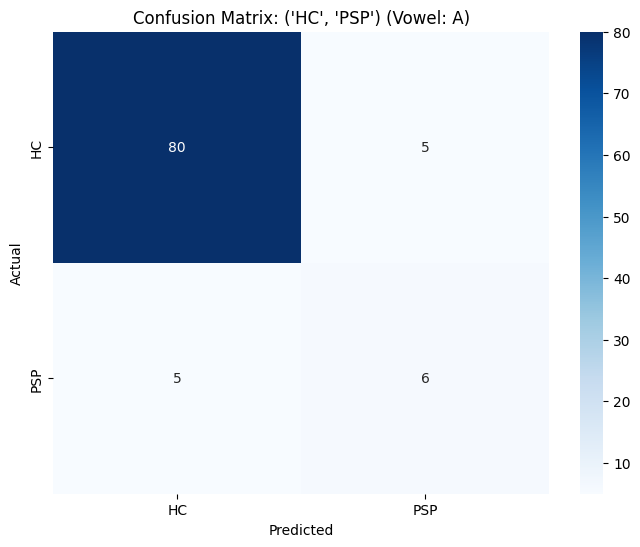

No sufficient data for ('HC', 'PSP') (Vowel: E).

Logistic Regression Results for ('HC', 'PSP') (Vowel: I):
Accuracy: 0.8730

Classification Report:
              precision    recall  f1-score   support

          HC       0.91      0.94      0.92        52
         PSP       0.67      0.55      0.60        11

    accuracy                           0.87        63
   macro avg       0.79      0.74      0.76        63
weighted avg       0.87      0.87      0.87        63



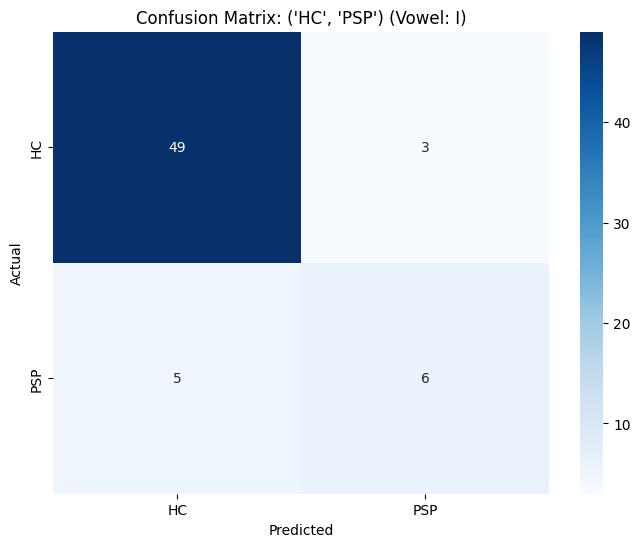

No sufficient data for ('HC', 'PSP') (Vowel: O).
No sufficient data for ('HC', 'PSP') (Vowel: U).

Logistic Regression Results for ('HC', 'MSA') (Vowel: A):
Accuracy: 0.9898

Classification Report:
              precision    recall  f1-score   support

          HC       0.99      1.00      0.99        85
         MSA       1.00      0.92      0.96        13

    accuracy                           0.99        98
   macro avg       0.99      0.96      0.98        98
weighted avg       0.99      0.99      0.99        98



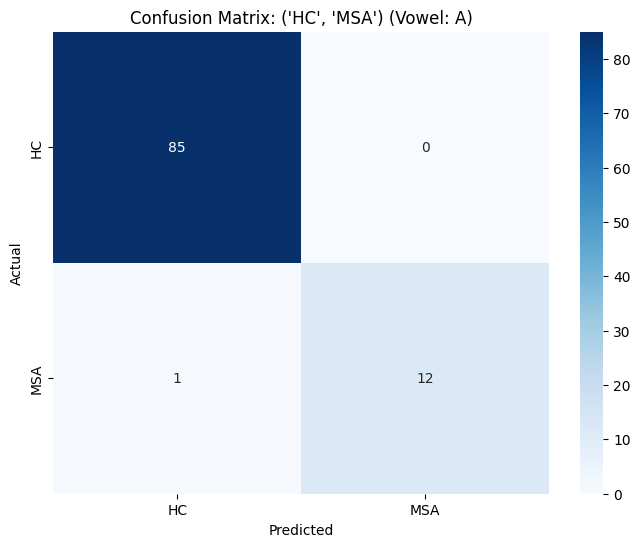

No sufficient data for ('HC', 'MSA') (Vowel: E).

Logistic Regression Results for ('HC', 'MSA') (Vowel: I):
Accuracy: 0.9385

Classification Report:
              precision    recall  f1-score   support

          HC       0.96      0.96      0.96        52
         MSA       0.85      0.85      0.85        13

    accuracy                           0.94        65
   macro avg       0.90      0.90      0.90        65
weighted avg       0.94      0.94      0.94        65



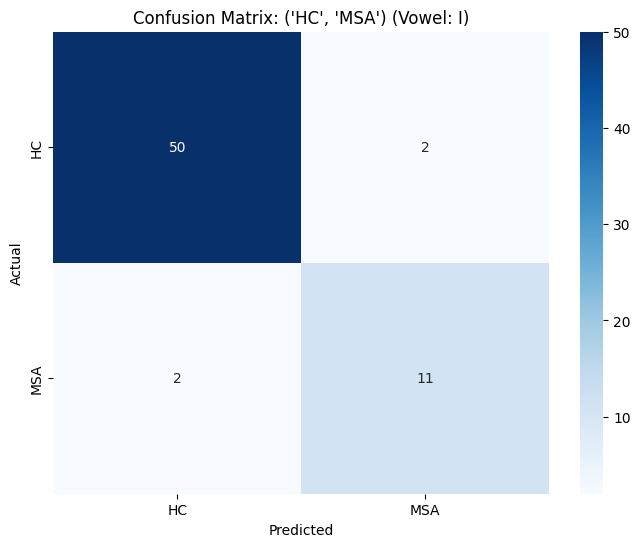

No sufficient data for ('HC', 'MSA') (Vowel: O).
No sufficient data for ('HC', 'MSA') (Vowel: U).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# # Load the dataset
# data = pd.read_csv("edward_filtered_metadata_acoustic_clinical.csv")

# # Step 1: Drop irrelevant columns
# columns_to_drop = [
#     'subjectID', 'file_path', 'filtered_file_path', 'Age', 'Sex', 'Severity', 
#     'Phoneme', 'Dataset', 'updated_file_path', 'resolved_path'
# ]
# data = data.drop(columns=columns_to_drop, errors="ignore")

# # Step 2: Handle missing values (Identify and impute)
# missing_summary = data.isnull().sum()

# # Impute missing values for numeric columns with their mean
# numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns
# data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# # Step 3: Separate features (X) and target (y)
# acoustic_features = data.columns.difference(["label"])  # All columns except 'label'
# X = data[acoustic_features]
# y = data["label"]

# Load the dataset
data = pd.read_csv("edward_filtered_metadata_acoustic_clinical.csv")

# Step 1: Drop irrelevant columns
columns_to_drop = ["subjectID", "file_path", "voiced_file_path", "Dataset"]
data = data.drop(columns=columns_to_drop, errors="ignore")

# Step 2: Encode categorical features
categorical_columns = ["Sex", "Age", "Severity"]  # Exclude "Phoneme" as we will handle it separately
encoder = LabelEncoder()
for col in categorical_columns:
    if col in data.columns:
        data[col] = encoder.fit_transform(data[col])

# Map vowels to ensure 'Phoneme' column is consistent with AEIOU
vowel_map = {"A": 0, "E": 1, "I": 2, "O": 3, "U": 4}
data["Phoneme"] = data["Phoneme"].map(vowel_map)

# Step 3: Handle missing values (Identify and impute)
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 4: Define helper function to train for specific subsets
def train_logistic_regression(data, disease_pair, vowel=None):
    """
    Trains a logistic regression model for a specific disease pair and optional vowel.
    """
    # Filter for the diseases
    filtered_data = data[data["label"].isin(disease_pair)]
    
    # Filter for the specific vowel if provided
    if vowel is not None:
        filtered_data = filtered_data[filtered_data["Phoneme"] == vowel]
    
    # Check if data is sufficient
    if filtered_data.empty or len(filtered_data["label"].unique()) < 2:
        print(f"No sufficient data for {disease_pair} (Vowel: {list(vowel_map.keys())[list(vowel_map.values()).index(vowel)]}).")
        return
    
    # Separate features and target
    acoustic_features = filtered_data.columns.difference(["label", "Phoneme"])
    X = filtered_data[acoustic_features]
    y = filtered_data["label"]
    
    # Scale numeric features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Train Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
    log_reg.fit(X_train, y_train)
    
    # Predictions and Evaluation
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nLogistic Regression Results for {disease_pair} (Vowel: {list(vowel_map.keys())[list(vowel_map.values()).index(vowel)]}):")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix, annot=True, fmt="d", cmap="Blues",
        xticklabels=disease_pair, yticklabels=disease_pair
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {disease_pair} (Vowel: {list(vowel_map.keys())[list(vowel_map.values()).index(vowel)]})")
    plt.show()

# Step 5: Train for each disease pair and vowel
disease_pairs = [("HC", "ALS"), ("HC", "PD"), ("HC", "PSP"), ("HC", "MSA")]  # Updated disease pairs
vowels = list(vowel_map.values())  # Ensure vowels match AEIOU mapping

for pair in disease_pairs:
    for vowel in vowels:
        train_logistic_regression(data, disease_pair=pair, vowel=vowel)



Phoneme column is encoded; attempting to decode...

Processing for Vowel: A
KNN Accuracy for Vowel A: 0.6106

Classification Report:
              precision    recall  f1-score   support

         ALS       0.56      0.60      0.58        40
          HC       0.60      0.72      0.65        85
         MSA       0.60      0.69      0.64        13
          PD       0.74      0.47      0.58        59
         PSP       0.50      0.45      0.48        11

    accuracy                           0.61       208
   macro avg       0.60      0.59      0.59       208
weighted avg       0.62      0.61      0.61       208



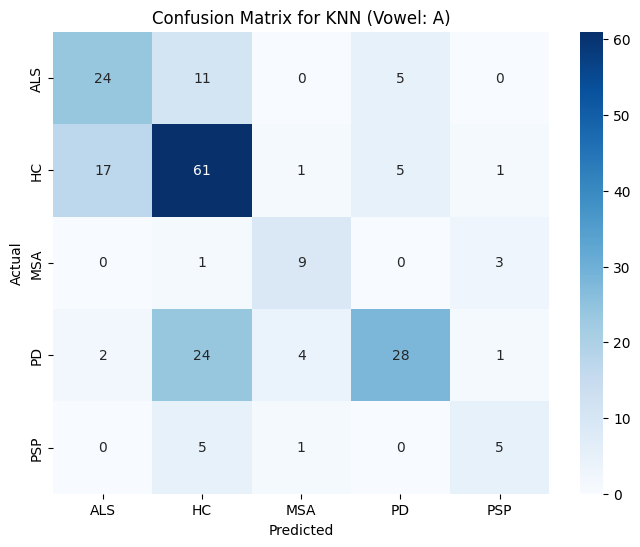


Processing for Vowel: E
KNN Accuracy for Vowel E: 0.6711

Classification Report:
              precision    recall  f1-score   support

         ALS       0.63      0.71      0.67        31
          HC       0.59      0.59      0.59        29
          PD       1.00      0.75      0.86        16

    accuracy                           0.67        76
   macro avg       0.74      0.68      0.70        76
weighted avg       0.69      0.67      0.68        76



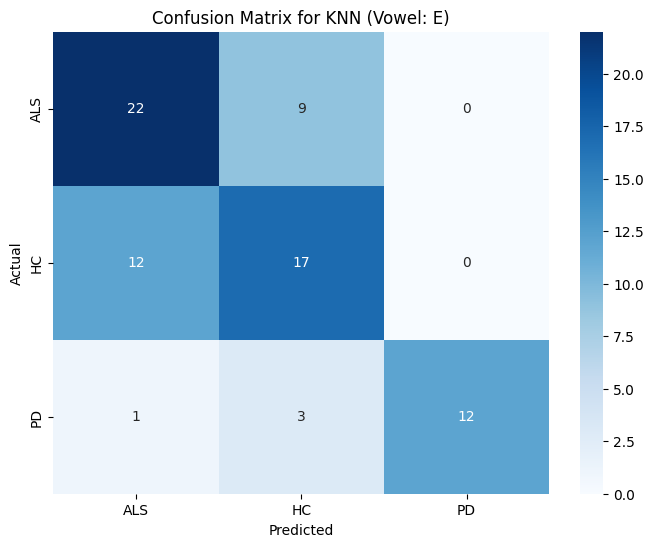


Processing for Vowel: I
KNN Accuracy for Vowel I: 0.6276

Classification Report:
              precision    recall  f1-score   support

         ALS       0.71      0.72      0.72        40
          HC       0.67      0.60      0.63        52
         MSA       0.55      0.50      0.52        12
          PD       0.55      0.70      0.62        30
         PSP       0.44      0.36      0.40        11

    accuracy                           0.63       145
   macro avg       0.58      0.58      0.58       145
weighted avg       0.63      0.63      0.63       145



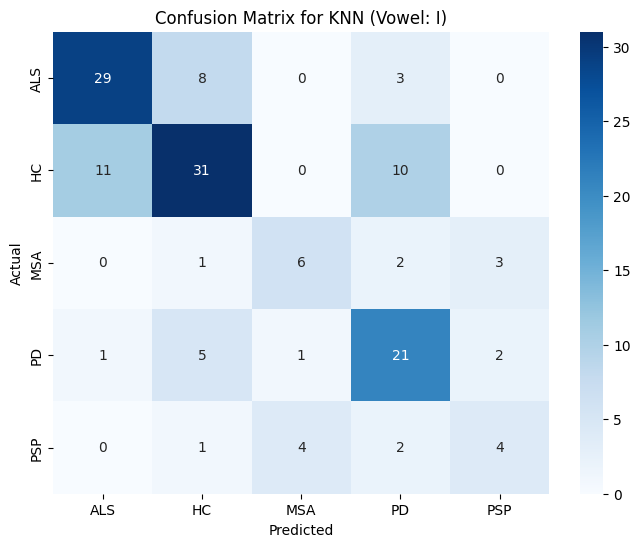


Processing for Vowel: O
KNN Accuracy for Vowel O: 0.7105

Classification Report:
              precision    recall  f1-score   support

         ALS       0.64      0.87      0.74        31
          HC       0.68      0.52      0.59        29
          PD       1.00      0.75      0.86        16

    accuracy                           0.71        76
   macro avg       0.77      0.71      0.73        76
weighted avg       0.73      0.71      0.71        76



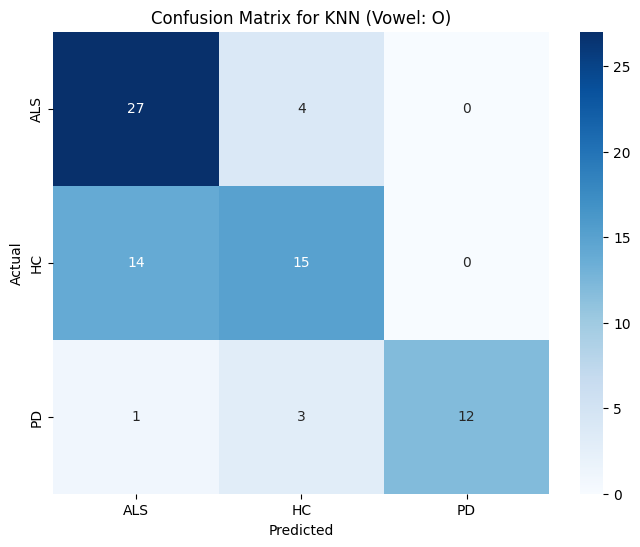


Processing for Vowel: U
KNN Accuracy for Vowel U: 0.6842

Classification Report:
              precision    recall  f1-score   support

         ALS       0.62      0.81      0.70        31
          HC       0.65      0.52      0.58        29
          PD       0.92      0.75      0.83        16

    accuracy                           0.68        76
   macro avg       0.73      0.69      0.70        76
weighted avg       0.70      0.68      0.68        76



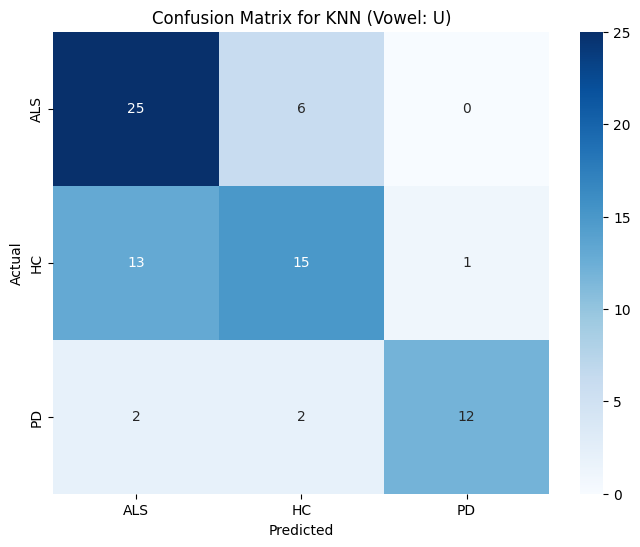

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_knn_per_vowel(data, n_neighbors=5):
    """
    Train and evaluate KNN classifier for each vowel.
    """
    # Check if "Phoneme" is encoded, and reverse the encoding if necessary
    if data["Phoneme"].dtype != "object":  # Likely encoded as numbers
        print("Phoneme column is encoded; attempting to decode...")
        phoneme_encoder = LabelEncoder()
        phoneme_encoder.fit(["A", "E", "I", "O", "U"])  # Assuming these are the original vowels
        try:
            data["Phoneme"] = phoneme_encoder.inverse_transform(data["Phoneme"])
        except ValueError:
            print("Error decoding 'Phoneme'. Ensure that it matches the encoded mapping.")
            return

    # Ensure "Phoneme" is in uppercase
    data["Phoneme"] = data["Phoneme"].astype(str).str.upper()
    vowels = ["A", "E", "I", "O", "U"]  # Standard vowels

    results = []  # To store results for each vowel

    for vowel in vowels:
        print(f"\nProcessing for Vowel: {vowel}")
        # Filter data for the current vowel
        filtered_data = data[data["Phoneme"] == vowel]
        
        # Check if filtered data exists
        if filtered_data.empty:
            print(f"No data available for vowel: {vowel}")
            continue
        
        # Separate features and target
        acoustic_features = filtered_data.select_dtypes(include=["float64", "int64"]).columns.difference(["label"])
        X = filtered_data[acoustic_features]
        y = filtered_data["label"]

        # Check if features or labels are empty
        if X.empty or y.empty:
            print(f"No valid data for vowel: {vowel}")
            continue
        
        # Encode target variable
        encoder = LabelEncoder()
        y_encoded = encoder.fit_transform(y)
        
        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Split into train and test sets
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
            )
        except ValueError as e:
            print(f"Error during train-test split for vowel {vowel}: {e}")
            continue
        
        # Train KNN model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights="distance")
        knn.fit(X_train, y_train)
        
        # Make predictions
        y_pred_knn = knn.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred_knn)
        print(f"KNN Accuracy for Vowel {vowel}: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred_knn, target_names=encoder.classes_))
        
        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred_knn)
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_
        )
        plt.title(f"Confusion Matrix for KNN (Vowel: {vowel})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

        # Save the results
        results.append({
            "Vowel": vowel,
            "Accuracy": accuracy,
            "Confusion_Matrix": conf_matrix
        })

    return results

# Assuming 'data' is your preprocessed DataFrame
results_knn = train_knn_per_vowel(data)


KNN Results (Accuracy Matrix):
  Vowel    HC-ALS     HC-PD    HC-PSP    HC-MSA
0     A  0.746032  0.751724  0.885417  0.959184
1     E  0.666667  0.844444       NaN       NaN
2     I  0.771739  0.756098  0.793651  0.800000
3     O  0.700000  0.822222       NaN       NaN
4     U  0.683333  0.866667       NaN       NaN


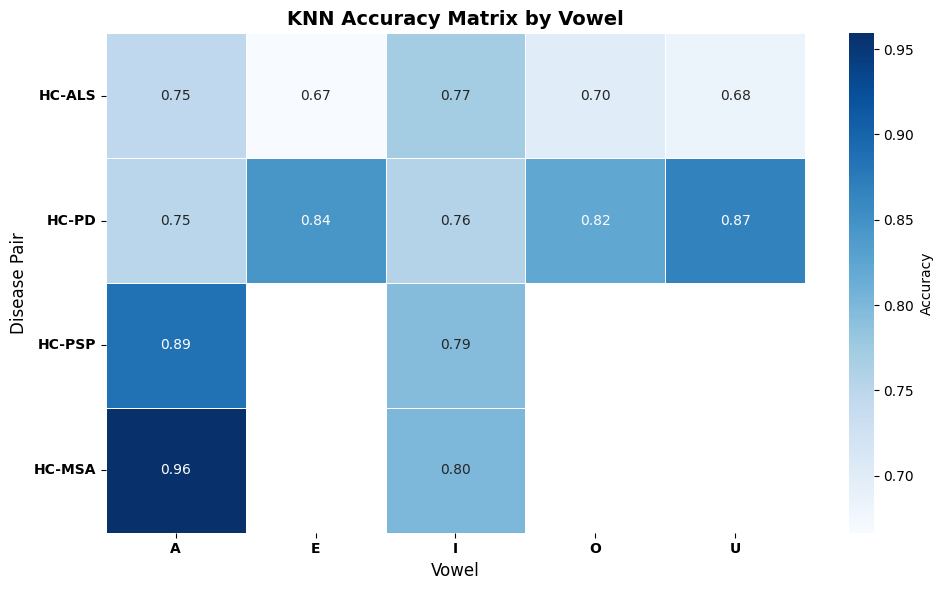

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New KNN Results
knn_results = {
    'Vowel': ['A', 'E', 'I', 'O', 'U'],
    'HC-ALS': [0.746032, 0.666667, 0.771739, 0.700000, 0.683333],
    'HC-PD': [0.751724, 0.844444, 0.756098, 0.822222, 0.866667],
    'HC-PSP': [0.885417, np.nan, 0.793651, np.nan, np.nan],
    'HC-MSA': [0.959184, np.nan, 0.800000, np.nan, np.nan],
}

# Convert results to DataFrame
results_df = pd.DataFrame(knn_results)

# Display the table
print("KNN Results (Accuracy Matrix):")
print(results_df)

# Heatmap Display
plt.figure(figsize=(10, 6))
sns.heatmap(
    results_df.set_index('Vowel').T,
    annot=True,
    cmap='Blues',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Accuracy'},
    annot_kws={"size": 10}
)
plt.title("KNN Accuracy Matrix by Vowel", fontsize=14, weight='bold')
plt.xlabel("Vowel", fontsize=12)
plt.ylabel("Disease Pair", fontsize=12)
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, rotation=0, weight='bold')
plt.tight_layout()
plt.show()
